This part is diving into the novel approach to approximate Bessel functions, abundent in cosmology as well as in other areas, through symbolic regression search

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

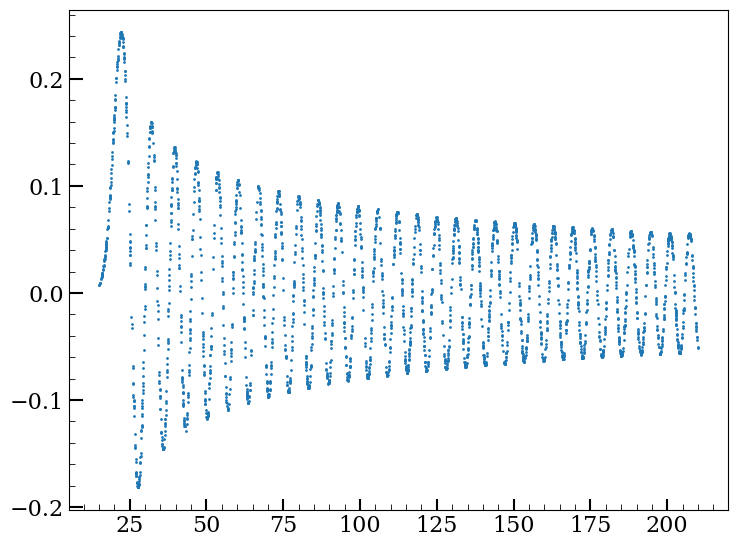

In [ ]:
np.random.seed(42) #Keeping the seed for reproducibility

order = 20

x_train = np.sort(np.random.uniform(15, 210, 3000))
# Training data from uniform distribution
x_test = np.sort(np.random.uniform(15, 210, 3000))

target_train = special.spherical_jn(order, x_train)
target_test = special.spherical_jn(order, x_test)

plt.scatter(x_train, target_train, s=1)

In [9]:
bessel_sph_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sin,cos",
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*10,
    'n_threads': 12,
    'tournament_size': 3
}

Bessel_sph_0 = Problem(f"Bessel spherical of order {order}", (x_train, target_train), (x_test, target_test), bessel_sph_0_args)

In [10]:
Bessel_sph_0.solve()

[0.07114057242870331, 5.0], 2772.46, (0.022664779797 + (0.000364821084 * ((-0.421625554562) * X1))), 0.01
[0.061028704047203064, 6.0], 2779.17, (0.004592342768 + ((-0.053036775440) * cos(((-0.983965635300) * X1)))), 0.00
[0.060151468962430954, 8.0], 2785.19, (0.004896935076 + ((-0.000447834143) * (cos(((-0.983906507492) * X1)) * (0.973328173161 * X1)))), 0.00
[0.05793611705303192, 9.0], 2793.62, (0.005747667048 + ((-0.044472612441) * (cos(((-0.982936143875) * X1)) + sin((0.930647253990 * X1))))), 0.00
[0.05741085484623909, 10.0], 2795.36, (0.005563522223 + ((-0.047934506088) * (cos(((-0.982936143875) * X1)) + sin(sin((0.930647253990 * X1)))))), 0.00
[0.05664626508951187, 11.0], 2796.37, (0.005237122532 + ((-0.032944042236) * ((cos(((-0.983186483383) * X1)) * 1.719745039940) + sin((0.931851565838 * X1))))), 0.00
[0.052925970405340195, 12.0], 2806.82, (0.005814083852 + ((-0.049649573863) * (sin((0.914058208466 * X1)) + (cos(((-0.983410775661) * X1)) + sin((0.934289574623 * X1)))))), 0.00

Text(0.5, 1.0, 'Pareto Front')

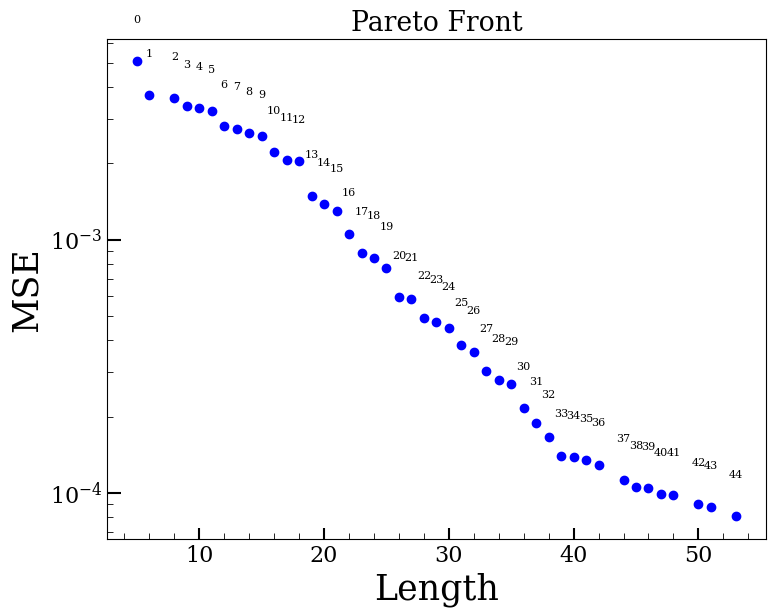

In [14]:
#Bessel_sph_0.solutions[5].plot_results()
Bessel_sph_0.plot_l_vs_mse()
plt.title("Pareto Front")

In [20]:
k=30
Bessel_sph_0.solutions[k].display_expression()
b_vals = Bessel_sph_0.solutions[k].extract_and_format()[1]
b_vals

<IPython.core.display.Math object>

{'b0': 0.022154883029276817,
 'b1': 0.8939313292499946,
 'b2': 0.044036317616999554,
 'b3': 0.9140582084660309,
 'b4': 0.9353363513949944,
 'b5': 0.9756221175190376,
 'b6': 0.9918508529659675,
 'b7': 0.006268453318999612,
 'b8': 0.7631342411040123,
 'b9': 0.056835364549996825,
 'b10': 0.11636438965800266,
 'b11': 0.3296439051629818,
 'b12': 0.7027021646499634,
 'b13': 0.03209297528564292}

spherical bessel function of first kind of order 20


<Axes: title={'center': 'Bessel spherical of order 20: solution 30 Train'}>

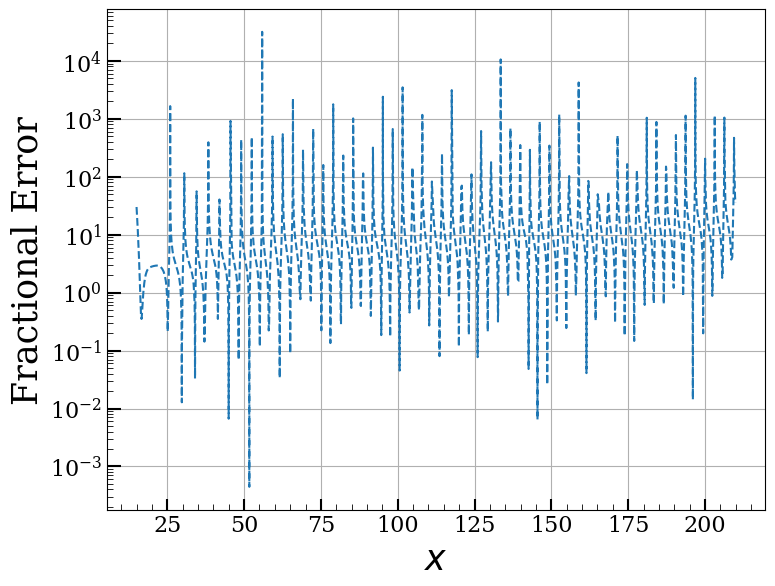

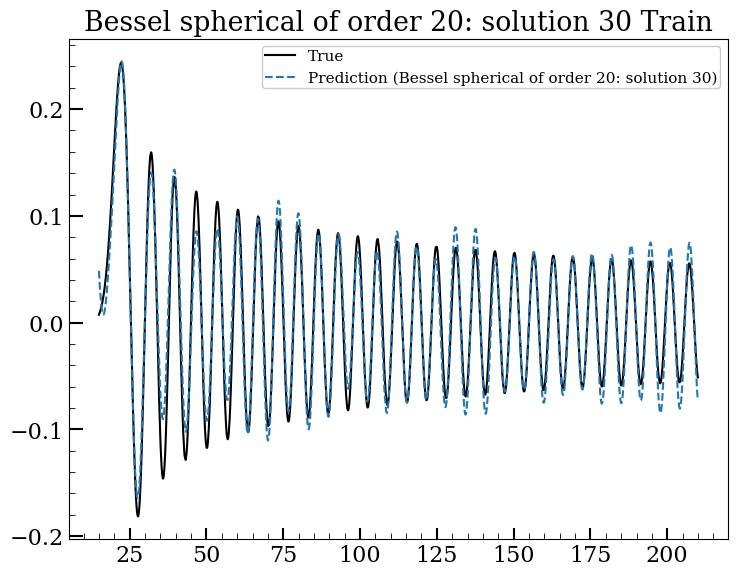

In [21]:
Bessel_sph_0.solutions[k].plot_fractional_error_bessel(x_test, order=order, kind = 'first', spherical=True)
Bessel_sph_0.solutions[k].plot_results()

In [17]:
from BesselML import Promising_solution
Solution_pareto5 = Promising_solution(Bessel_sph_0.solutions[k].sympy_expr, (x_train, target_train), Bessel_sph_0.solutions[5], b_vals)